## ***Solving MNIST dataset with ANN using Tensorflow***

### **Importing dependencies for data visualization**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style("darkgrid")

### **Importing machine learning (deep learning) framework**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #importing mnist dataset from tensorflow.keras

loading dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fetching single image from the dataset

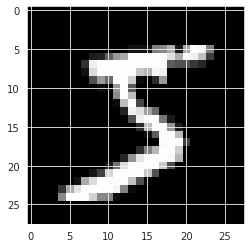

In [5]:
single_img = X_train[0]
plt.imshow(X = single_img, cmap = 'gray')
plt.show()

In [6]:
y_train[0] #label for above image

5

## **Data preprocessing**

In [7]:
from tensorflow.keras.utils import to_categorical

Making labels as OneHot vectors

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Scaling the dataset from [0, 1]

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshaping the dataset 

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## **GPU check**

In [11]:
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
print(f'Found GPU at: {device}')

Found GPU at: /device:GPU:0


## **Building model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(     # to monitor the growth of validation loss
    monitor = 'val_loss', 
    mode = 'min', 
    patience = 3
)

with tf.device('/gpu:0'):

  model = Sequential([
      Flatten(input_shape = (28, 28)),
      Dense(units = 128, activation = 'relu'),
      Dropout(rate = 0.2),
      Dense(units = 128, activation = 'relu'),
      Dropout(rate = 0.2),
      Dense(units = 10, activation = 'softmax')
  ])

  model.compile(
      optimizer = 'adam', 
      loss = 'categorical_crossentropy', 
      metrics = ['accuracy']
  )
  
  model.fit(
      x = X_train, 
      y = y_train, 
      batch_size = 128, 
      epochs = 25, 
      validation_data = (X_test, y_test),
      callbacks = [early_stop]
  )
  print("\nModel trained !!!")

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4048 - accuracy: 0.8796 - val_loss: 0.1559 - val_accuracy: 0.9529
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9481 - val_loss: 0.1166 - val_accuracy: 0.9656
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9596 - val_loss: 0.0909 - val_accuracy: 0.9718
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.0823 - val_accuracy: 0.9762
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9717 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9740 - val_loss: 0.0703 - val_accuracy: 0.9794
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.0669 - val_accuracy: 0.9793
Epoch 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________________________

## **Model evaluation**

In [15]:
history = pd.DataFrame(model.history.history)
losses = history[['loss', 'val_loss']]
accuracy = history[['accuracy', 'val_accuracy']]

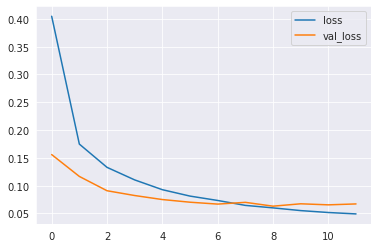

In [16]:
losses.plot()

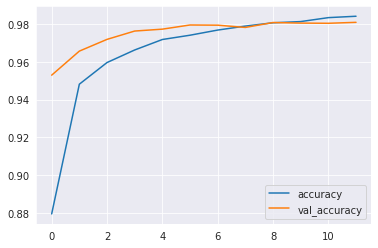

In [17]:
accuracy.plot()